# pynq 协同microblaze演示
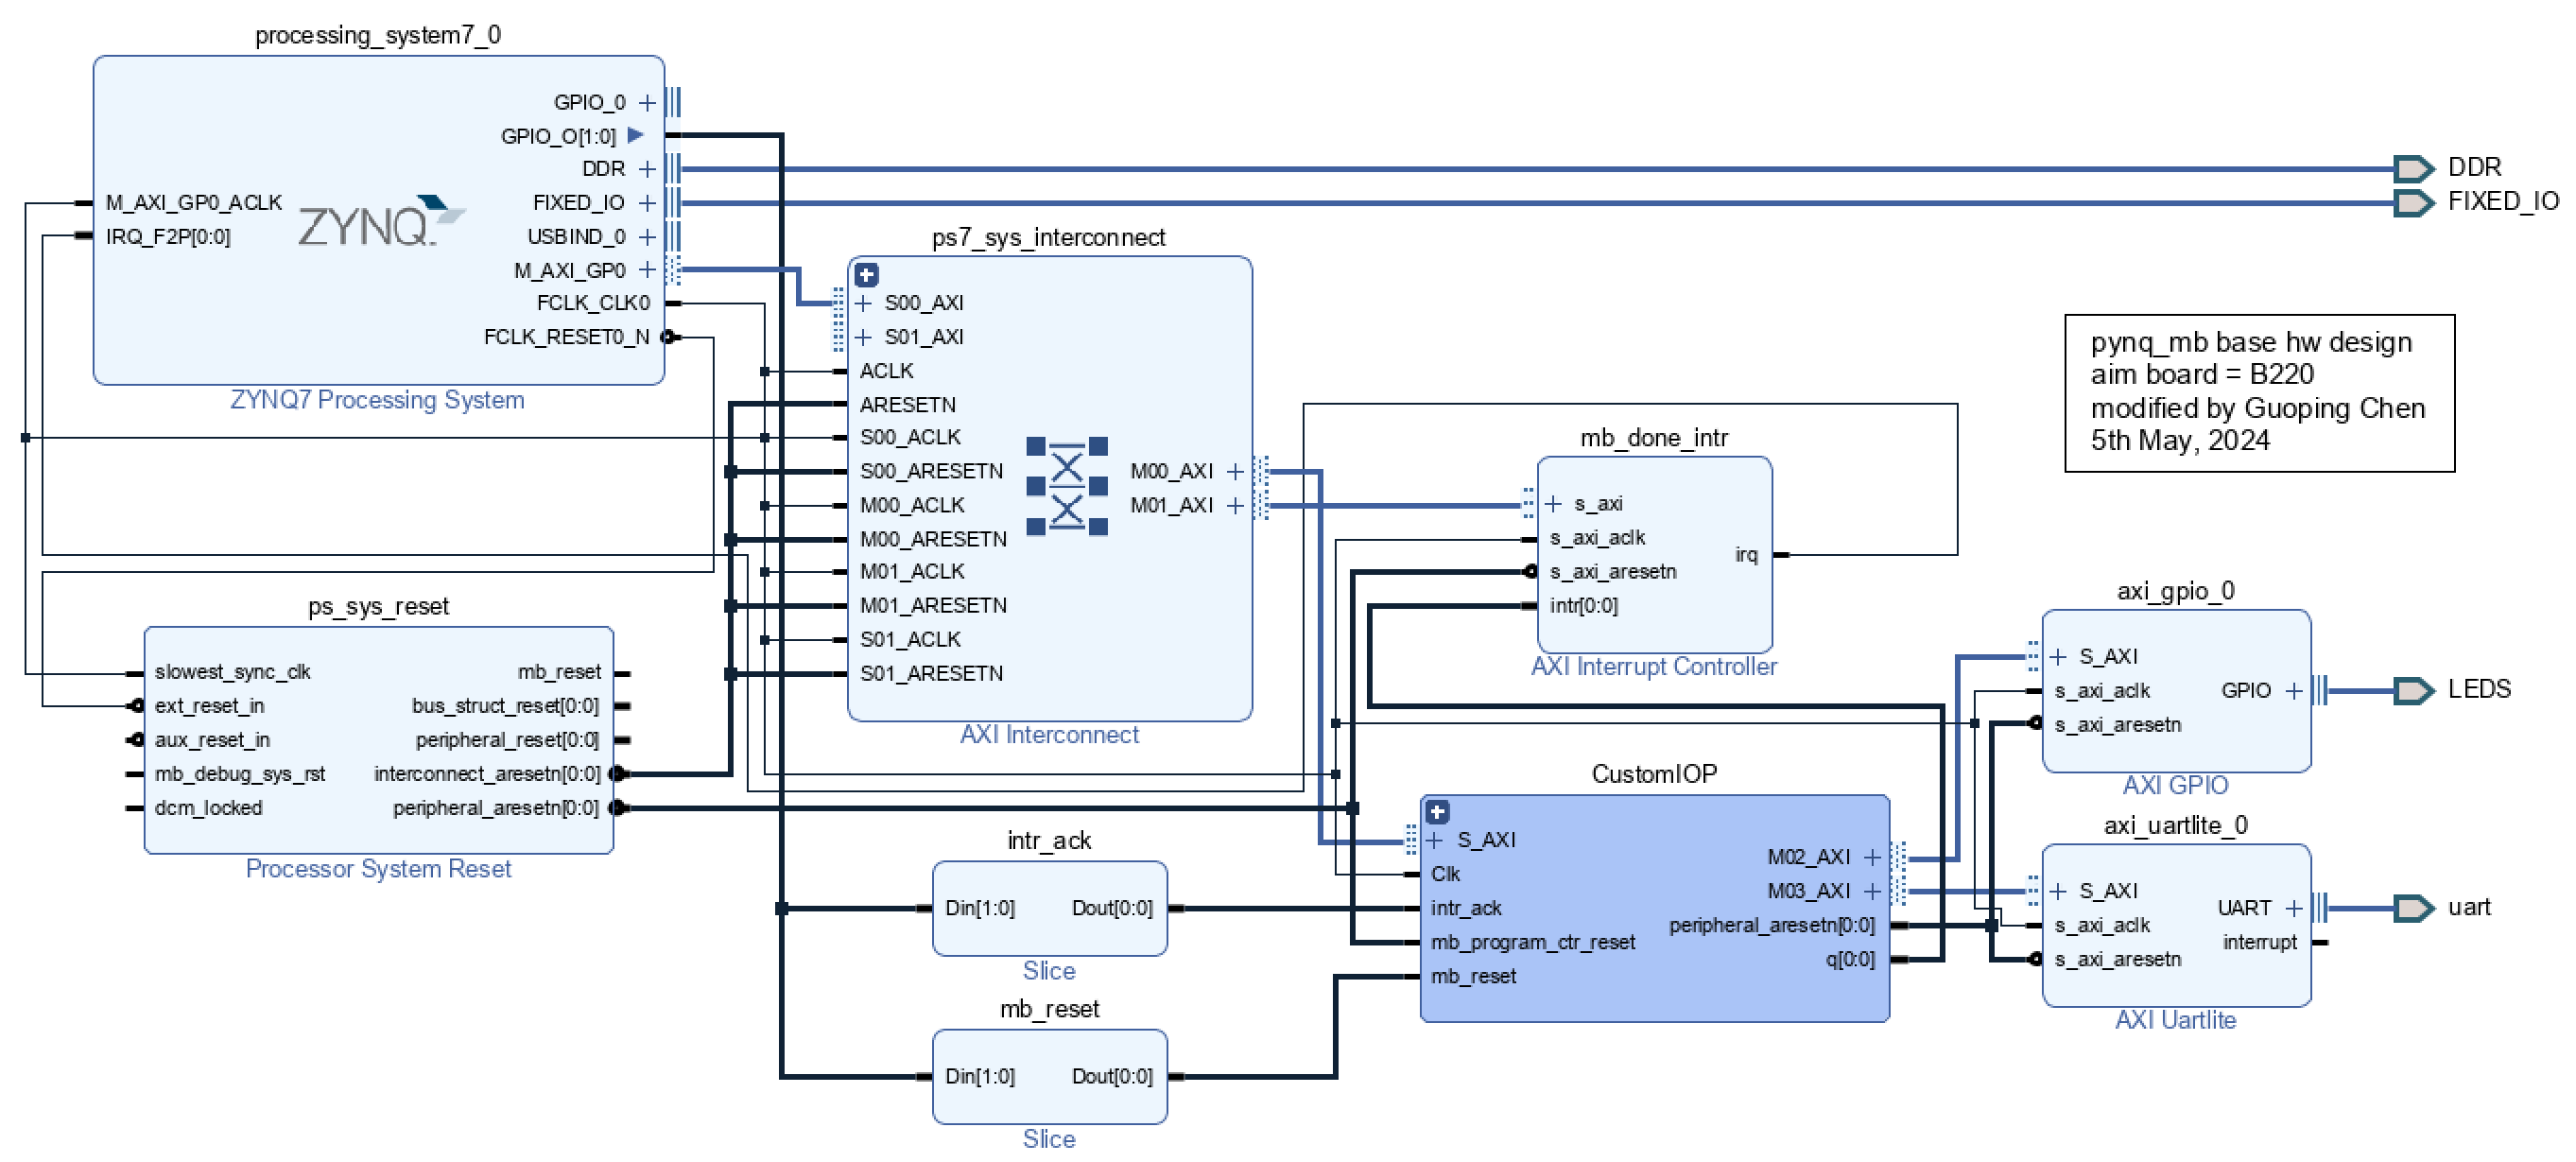
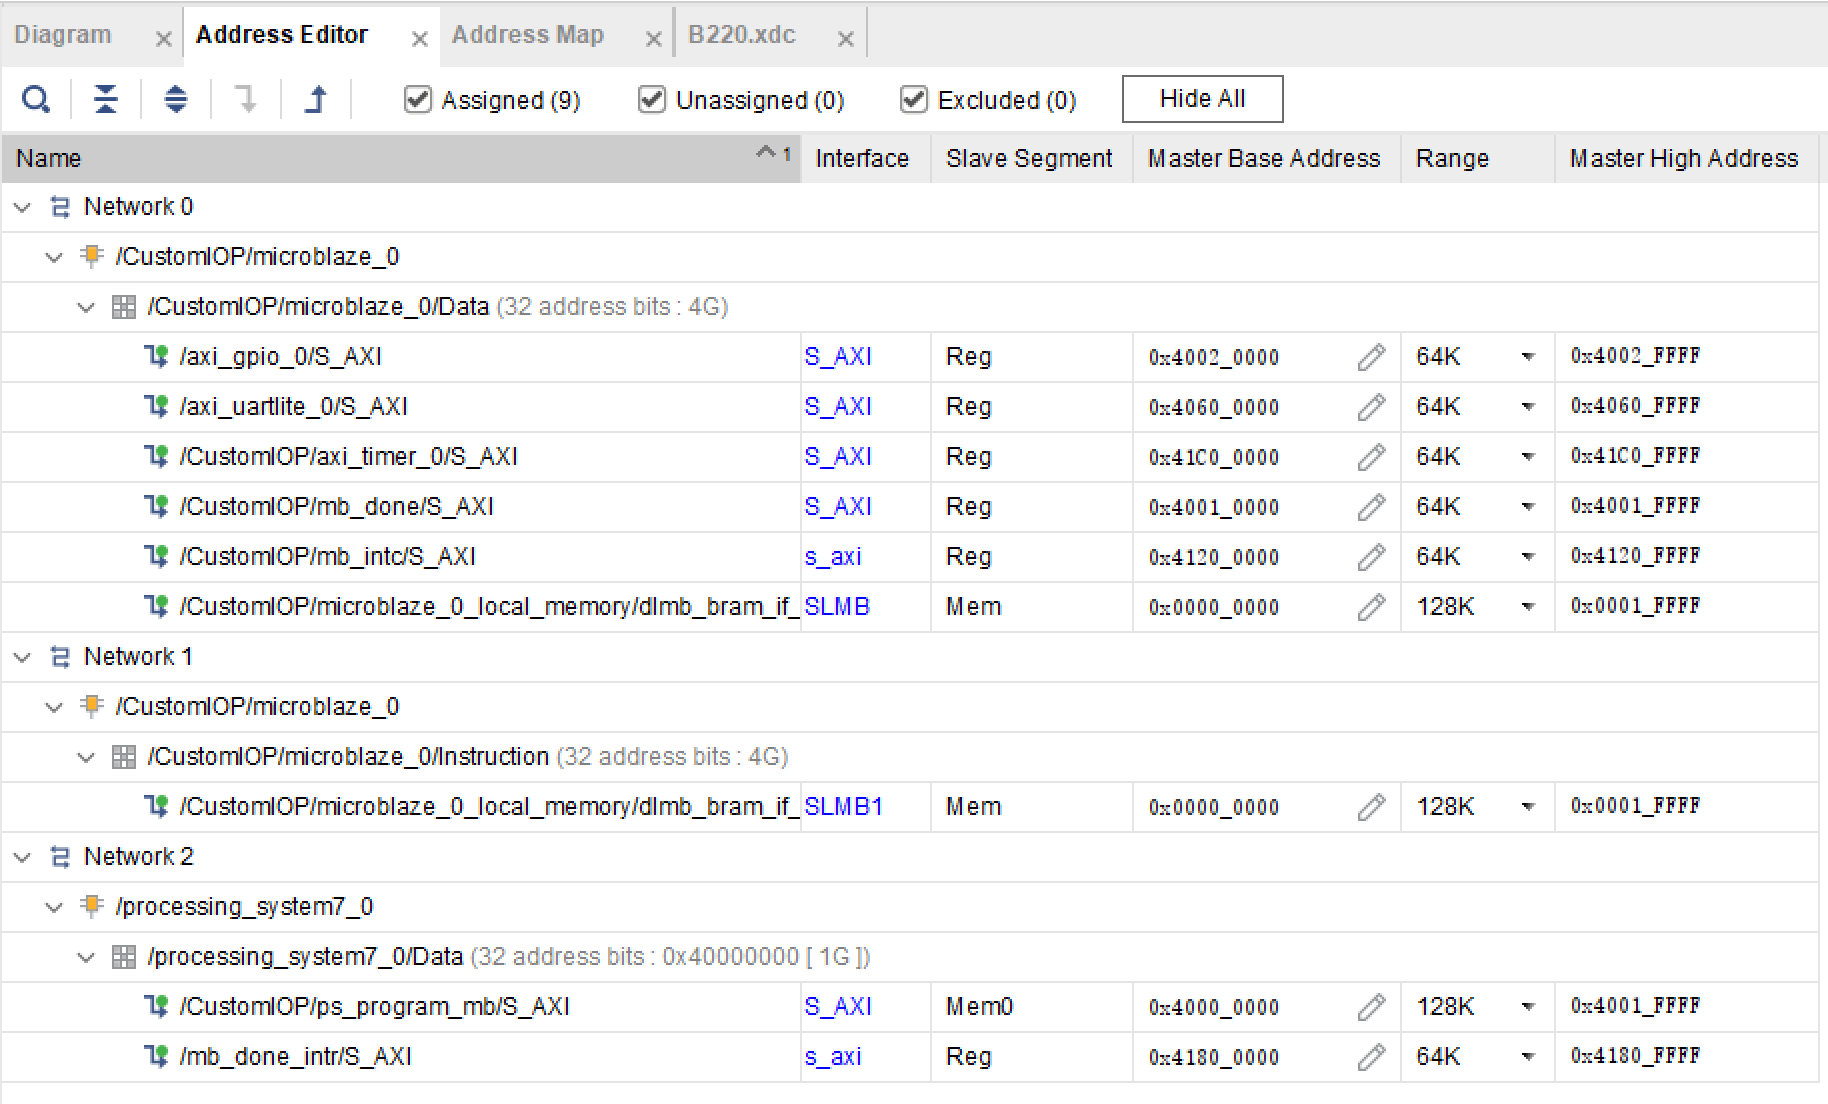

## 该设计的mb系统具有128k 数据和指令bram内存，并具有一个axi-timer和axi-uart,可以运行freertos

In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/mb_rtos.bit')

In [3]:
# ol.ip_dict

{'mb_done_intr': {'type': 'xilinx.com:ip:axi_intc:4.1',
  'mem_id': 's_axi',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {'intr': {'controller': 'mb_done_intr',
    'index': 0,
    'fullpath': 'mb_done_intr/intr'}},
  'parameters': {'C_FAMILY': 'zynq',
   'C_INSTANCE': 'design_1_mb_done_intr_1',
   'C_S_AXI_ADDR_WIDTH': '9',
   'C_S_AXI_DATA_WIDTH': '32',
   'C_NUM_INTR_INPUTS': '1',
   'C_NUM_SW_INTR': '0',
   'C_KIND_OF_INTR': '0xFFFFFFFF',
   'C_KIND_OF_EDGE': '0xFFFFFFFF',
   'C_KIND_OF_LVL': '0xFFFFFFFF',
   'C_ASYNC_INTR': '0xFFFFFFFF',
   'C_NUM_SYNC_FF': '2',
   'C_ADDR_WIDTH': '32',
   'C_IVAR_RESET_VALUE': '0x0000000000000010',
   'C_ENABLE_ASYNC': '0',
   'C_HAS_IPR': '1',
   'C_HAS_SIE': '1',
   'C_HAS_CIE': '1',
   'C_HAS_IVR': '1',
   'C_HAS_ILR': '0',
   'C_IRQ_IS_LEVEL': '1',
   'C_IRQ_ACTIVE': '0x1',
   'C_DISABLE_SYNCHRONIZERS': '0',
   'C_MB_CLK_NOT_CONNECTED': '1',
   'C_HAS_FAST': '0',
   'C_EN_CASCADE_MODE': '0',
   'C_CASCADE_MASTER': '0',
   'Componen

In [4]:
# ol.mem_dict

{'CustomIOP/ps_program_mb': {'fullpath': 'CustomIOP/ps_program_mb',
  'type': 'DDR4',
  'bdtype': None,
  'state': None,
  'addr_range': 131072,
  'phys_addr': 1073741824,
  'mem_id': 'S_AXI',
  'memtype': 'MEMORY',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_BRAM_INST_MODE': 'EXTERNAL',
   'C_MEMORY_DEPTH': '32768',
   'C_BRAM_ADDR_WIDTH': '15',
   'C_S_AXI_ADDR_WIDTH': '17',
   'C_S_AXI_DATA_WIDTH': '32',
   'C_S_AXI_ID_WIDTH': '13',
   'C_S_AXI_PROTOCOL': 'AXI4',
   'C_S_AXI_SUPPORTS_NARROW_BURST': '1',
   'C_SINGLE_PORT_BRAM': '1',
   'C_FAMILY': 'zynq',
   'C_READ_LATENCY': '1',
   'C_RD_CMD_OPTIMIZATION': '0',
   'C_S_AXI_CTRL_ADDR_WIDTH': '32',
   'C_S_AXI_CTRL_DATA_WIDTH': '32',
   'C_ECC': '0',
   'C_ECC_TYPE': '0',
   'C_FAULT_INJECT': '0',
   'C_ECC_ONOFF_RESET_VALUE': '0',
   'DATA_WIDTH': '32',
   'ID_WIDTH': '13',
   'PROTOCOL': 'AXI4',
   'SUPPORTS_NARROW_BURST': '1',
   'SINGLE_PORT_BRAM': '1',
   'ECC_TYPE': 'Hamming',
   'USE_ECC': '0',
   'FAULT_INJECT': '0

In [5]:
from pynq.lib import PynqMicroblaze

In [6]:
import time
class MB(PynqMicroblaze):
    def __init__(self, mb_info, mb_program):
        super().__init__(mb_info, mb_program)

    def write_mailbox(self, data_offset, data):
        offset = MAILBOX_OFFSET + data_offset
        self.write(offset, data)

    def read_mailbox(self, data_offset, num_words=1):
        offset = MAILBOX_OFFSET + data_offset
        return self.read(offset, num_words)

    def write_blocking_command(self, command):
        self.write(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET, command)
        while self.read(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET) != 0:
            pass
    def write_blocking_command_addr(self, addr, command):
        self.write(addr, command)
        while self.read(addr) != 0:
            pass        

    def write_non_blocking_command(self, command):
        self.write(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET, command)

In [7]:
customIOP = {
    'ip_name': ol.CustomIOP.description["memories"]["ps_program_mb"]["fullpath"], #'CustomIOP/axi_bram_ctrl_0',
    'rst_name': "mb_reset", #'mb_iop_pmoda_reset',
    'intr_pin_name': "CustomIOP/mb_done_intr/q", #'iop_pmoda/dff_en_reset_vector_0/q'
    'intr_ack_name': "intr_ack"#'mb_iop_pmoda_intr_ack'
    }

In [8]:
mb_info = customIOP

_mb = MB(mb_info, "main.bin")

In [9]:
MAILBOX_OFFSET = 0xF000
MAILBOX_SIZE = 0x1000
MAILBOX_PY2IOP_CMD_OFFSET = 0xffc
MAILBOX_PY2IOP_ADDR_OFFSET = 0xff8
MAILBOX_PY2IOP_DATA_OFFSET = 0xf00

WRITE_LED = 0x9
READ_LED = 0x23
TEST_CYCLE = 0X69

In [10]:
_mb.state

'RUNNING'

In [13]:
_mb.write_mailbox(0, 1)
_mb.write_blocking_command(WRITE_LED)

In [14]:
_mb.write_mailbox(0, 0)
_mb.write_blocking_command(WRITE_LED)
_mb.write_blocking_command(READ_LED)
_mb.read_mailbox(0x0)

0